# Credit Card Default Prediction

## Scope

Do an exploratory data analysis on the Credit card default dataset.

- Understand the overall data

- Do some basic cleaning

- Plot and gather insights

### Imports

In [1]:
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
print(f'pandas:{pd.__version__}')
print(f'seaborn:{sns.__version__}')
print(f'altair:{alt.__version__}')
print(f'python:{sys.version}')

pandas:2.0.1
seaborn:0.12.2
altair:5.0.0
python:3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]


## Path

<ins>**Change the BASE path to your folder location**</ins>

In [3]:
BASE = r"C:\\Users\\anand\\Documents\\Credit_card_default_prediction"

PATH = BASE + r"\\data\\raw\\"

EXPORT = BASE + r"\\data\\processed\\"

## Read Data

In [4]:
# Read excel
df = pd.read_csv(PATH + r"UCI_Credit_Card.csv")

# Preview
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
# Shape of data
df.shape

(30000, 25)

In [6]:
# Preview columns
df.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0


In [7]:
# Mean and quantiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
# Check for null values
df.isna().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

No null values

In [9]:
# Drop id column
df = df.drop('ID', axis=1)

# Preview
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## EDA 

### Default

In [10]:
# Distribution of grade
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

20% of the customers had defaulted.

### Gender

In [11]:
# Distribution of gender
df.SEX.value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

<Axes: xlabel='SEX', ylabel='default.payment.next.month'>

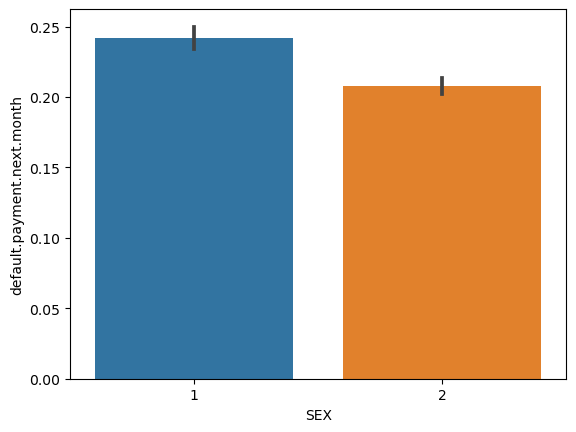

In [12]:
# Barplot
sns.barplot(df, x='SEX',y='default.payment.next.month')

On average, males tend to default slightly more than females.

### Education

In [13]:
# Distribution of education
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='default.payment.next.month'>

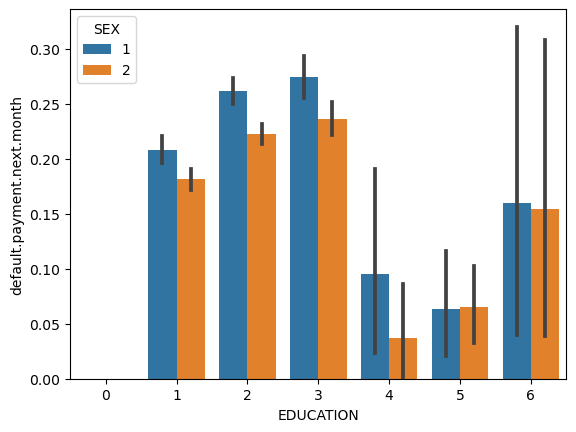

In [14]:
# Bar plot
sns.barplot(df, x='EDUCATION',y='default.payment.next.month',hue='SEX')

The others and unknown have low sample size. There is a 0 which is not mentioned in the dataset values. 

0,4,5 and 6 will be grouped as other.

In [15]:
# Replace 0,5 and 6 to 4
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)

df.loc[fil, 'EDUCATION'] = 4

# Preview
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

### Married

In [16]:
# Distribution of education
df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='default.payment.next.month'>

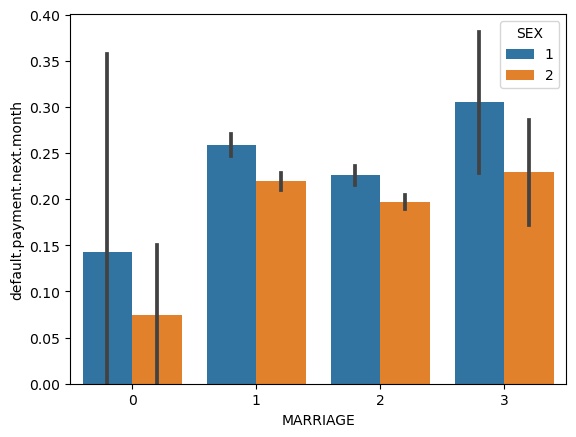

In [17]:
# Bar plot
sns.barplot(df, x='MARRIAGE',y='default.payment.next.month',hue='SEX')

Married people have slightly higher default rate than single. 

0 will be consider as other.

In [18]:
# Replace 0 to 3
fil = (df.MARRIAGE == 0)

df.loc[fil, 'MARRIAGE'] = 3

# Preview
df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

### Age

In [19]:
# Convert to age brackets
age_bracket=pd.cut(df.AGE, bins=5, right=False)

# Preview
age_bracket

0        [21.0, 32.6)
1        [21.0, 32.6)
2        [32.6, 44.2)
3        [32.6, 44.2)
4        [55.8, 67.4)
             ...     
29995    [32.6, 44.2)
29996    [32.6, 44.2)
29997    [32.6, 44.2)
29998    [32.6, 44.2)
29999    [44.2, 55.8)
Name: AGE, Length: 30000, dtype: category
Categories (5, interval[float64, left]): [[21.0, 32.6) < [32.6, 44.2) < [44.2, 55.8) < [55.8, 67.4) < [67.4, 79.058)]

In [20]:
# Distribution of age
age_bracket.value_counts()

AGE
[21.0, 32.6)      13388
[32.6, 44.2)      11326
[44.2, 55.8)       4442
[55.8, 67.4)        799
[67.4, 79.058)       45
Name: count, dtype: int64

<Axes: xlabel='AGE', ylabel='default.payment.next.month'>

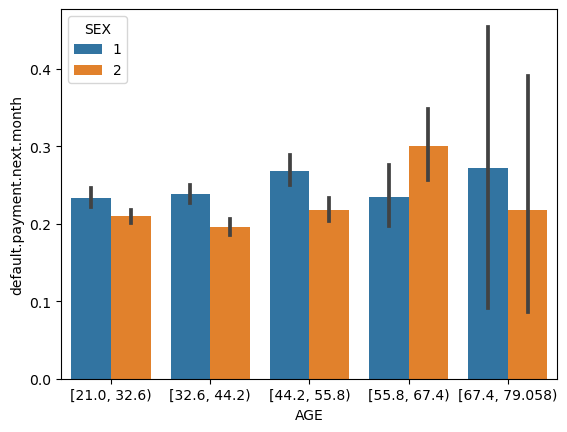

In [21]:
# Bar plot
sns.barplot(x=age_bracket,y=df['default.payment.next.month'],hue=df['SEX'])

Majority of customers are in the 20-45 age range. General trend of younger customers having lower default rate.

### Repayment status

In [22]:
# Distribution of repayment status
df.PAY_0.value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

<Axes: xlabel='PAY_0', ylabel='default.payment.next.month'>

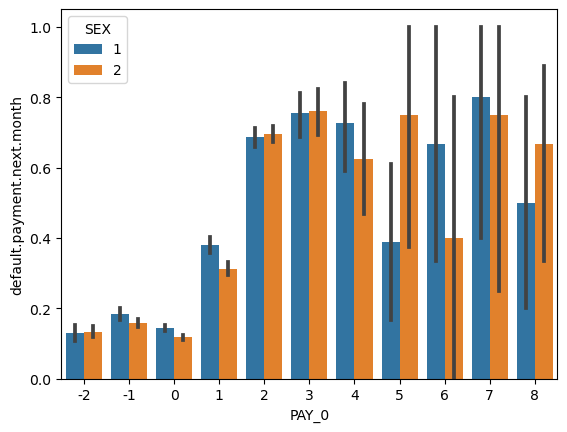

In [23]:
# Bar plot
sns.barplot(df, x='PAY_0',y='default.payment.next.month',hue='SEX')

**0 and -2 are new values, but they seem to represent pay duly, so -1,-2 and 0 will be combined together as 0.**

People who pay duly have lower default rate.

In [24]:
# Replace -2,-1 to 0 for all features
fil = (df.PAY_0 == -2) | (df.PAY_0 == -1) | (df.PAY_0 == 0)
df.loc[fil, 'PAY_0'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

# Preview
for i in ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    
    print(df[i].value_counts())

PAY_0
0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: count, dtype: int64
PAY_2
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: count, dtype: int64
PAY_3
0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: count, dtype: int64
PAY_4
0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: count, dtype: int64
PAY_5
0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: count, dtype: int64
PAY_6
0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: count, dtype: int64


In [25]:
# Converting to long form
long = pd.melt(
    df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month']],
    id_vars='default.payment.next.month',
    value_vars=['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
)

# Preview
long.head()

,default.payment.next.month,variable,value
0,1,PAY_0,2
1,1,PAY_0,0
2,0,PAY_0,0
3,0,PAY_0,0
4,0,PAY_0,0


<Axes: xlabel='value', ylabel='default.payment.next.month'>

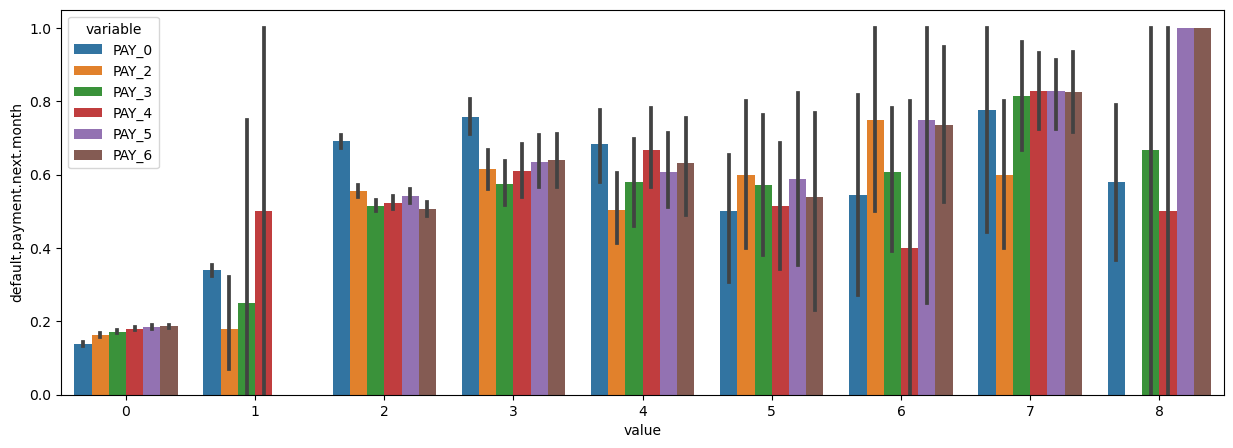

In [26]:
# Bar plot
plt.figure(figsize=(15,5))
sns.barplot(long, x='value',y='default.payment.next.month',hue='variable')

No trend to be seen monthly on repayment status.

### Bill Amount

In [27]:
# Convert to bill brackets
bill=pd.cut(df.BILL_AMT1, bins=20, right=False)

# Preview
bill.head()

0    [-52570.9, 3933.65)
1    [-52570.9, 3933.65)
2     [3933.65, 60438.2)
3     [3933.65, 60438.2)
4     [3933.65, 60438.2)
Name: BILL_AMT1, dtype: category
Categories (20, interval[float64, left]): [[-165580.0, -109075.45) < [-109075.45, -52570.9) < [-52570.9, 3933.65) < [3933.65, 60438.2) ... [738492.8, 794997.35) < [794997.35, 851501.9) < [851501.9, 908006.45) < [908006.45, 965641.091)]

In [28]:
# Distribution of bill amount
bill.value_counts()

BILL_AMT1
[3933.65, 60438.2)         14125
[-52570.9, 3933.65)         7760
[60438.2, 116942.75)        4092
[116942.75, 173447.3)       1915
[173447.3, 229951.85)       1015
[229951.85, 286456.4)        519
[286456.4, 342960.95)        251
[342960.95, 399465.5)        146
[399465.5, 455970.05)         86
[455970.05, 512474.6)         57
[512474.6, 568979.15)         16
[568979.15, 625483.7)         11
[625483.7, 681988.25)          3
[-165580.0, -109075.45)        2
[738492.8, 794997.35)          1
[908006.45, 965641.091)        1
[-109075.45, -52570.9)         0
[681988.25, 738492.8)          0
[794997.35, 851501.9)          0
[851501.9, 908006.45)          0
Name: count, dtype: int64

<Axes: xlabel='BILL_AMT1', ylabel='default.payment.next.month'>

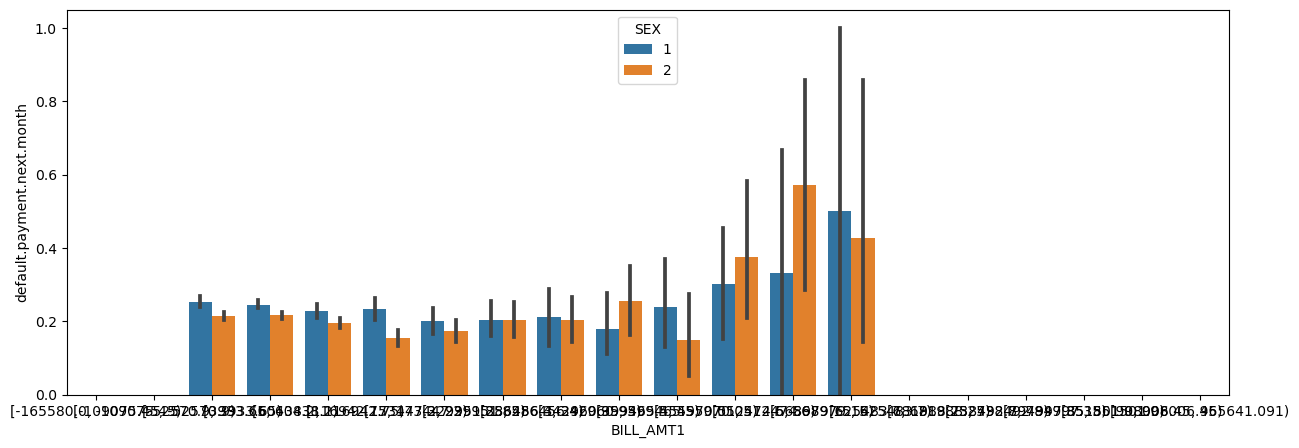

In [29]:
# Bar plot
plt.figure(figsize=(15,5))
sns.barplot(x=bill,y=df['default.payment.next.month'],hue=df['SEX'])

General trend of default rate increasing with higher bill amount.

### Previous Payment

In [30]:
# Quantiles
df.PAY_AMT1.describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

Payment amount are highly varied with majority being small values.

## Export

In [31]:
# Save to parquet
df.to_parquet(EXPORT + r"credit_card.pqt")